# Requirement Summary
## 1. Background:

- "Surprise Housing", a US-based company, is entering the Australian housing market.
- They want to use data analytics to buy houses below actual/market value and flip them for profit.
- They have collected a dataset of house sales in Australia.

## 2. Business Goal:

- Build a regression model with regularization to predict the actual value of prospective properties.
- Use the model to decide whether to invest in those properties.
- Gain insights into how house prices vary with different variables.

## 3. Data:

- CSV file [train.csv](https://ml-course3-upgrad.s3.amazonaws.com/Assignment_+Advanced+Regression/train.csv) containing data on past house sales in Australia.
- Field definitions provided in [Data Definition File](https://cdn.upgrad.com/UpGrad/temp/87f67e28-c47e-4725-ae3c-111142c7eaba/data_description.txt)

## 4. Requirements:

### Part-1 - A. Identify significant predictor variables:

- Determine which variables in the data are most important for predicting house price.
- Use appropriate statistical methods for variable selection.

### Part-1 - B. Assess model performance:

- Measure how well the chosen variables describe house price using R-squared, mean squared error, and other relevant metrics.

### Part-1 - C. Optimize regularization parameters:

- Find the optimal values of lambda for both ridge and lasso regression.
- Usr techniques like cross-validation and grid search.

### Q-1. Figure the Optimal value of regularization parameters:
- What is the optimal value of alpha for ridge and lasso regression?
- What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 
- What will be the most important predictor variables after the change is implemented?


### Q-2. Interpret and compare models:

- Explain the impact of changing alpha on the model and the most important predictor variables.
- Choose the best model (ridge or lasso) based on performance and explain the rationale.

### Q-3. Handle missing important predictors:

- Develop a new model excluding the five most important predictors unavailable in new data.
- Identify the new most Five most important predictors in new model.

### Q-4. Ensure robustness and generalizability:

- Implement techniques like data augmentation and k-fold cross-validation to ensure the model performs well on unseen data.
- Explain the implications of robustness and generalizability for model accuracy.

## 4. Key Constraints:

- Five most important predictors from the lasso model might be unavailable in new data.
- The model needs to be robust and generalizable to unseen data.

## 5. Key Outcomes:

- A regression model for predicting house price in Australia.
- Identification of significant predictor variables for house price.
- Insights into how house price varies with different variables.
- Understanding of the impact of regularization and missing data on the model.



# High Level Approach:

## 1. Data Exploration and Cleaning:

- Visualize distributions of numerical features and relationships between features.
- Check for missing values and outliers.
- Handle missing values with appropriate imputation techniques (e.g., mean/median imputation, k-nearest neighbors).
- Address outliers winsorizing or capping if they don't represent noise.
- Encode categorical features using label encoding, one-hot encoding, or target encoding as appropriate.

## 2. Feature Engineering:
- Create new features based on domain knowledge and exploratory analysis (e.g., age of house, total living area, price per square foot).
- Select the most informative features using techniques like correlation analysis or feature importance methods.

## 3. Model Selection and Tuning:

- Implement and compare different linear regression models (OLS, ridge, lasso).
- Use cross-validation or grid search to find optimal hyperparameters for each model.
- Evaluate models based on R-squared, mean squared error, and other relevant metrics.

## 4. Regularization for Robustness:

- Choose the best model and apply regularization (ridge, lasso, or elastic net) to prevent overfitting.
- Fine-tune regularization parameters for optimal performance.

## 5. Addressing Missing Predictors:

- If the five most important predictors from the lasso model are unavailable, create a new model without them.
- Analyze which variables are still available and select the most promising ones based on feature importance or expert knowledge.
- Reiterate steps 3-4 with the new feature set.

## 6. Generalizability and Testing:

- Use k-fold cross-validation to assess model generalizability on unseen data.
- Monitor model performance across different data subsets to detect potential biases.
- Consider non-linear models if necessary based on performance and data characteristics.

## 7. Interpretation and Communication:

Provide visualizations, feature importance analyses, and confidence intervals to explain model predictions and limitations.
Clearly communicate the key findings and insights for actionable decision-making.

In [5]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings # Supress Warnings

warnings.filterwarnings('ignore')

In [9]:
## Documenting the Specific Versions of Libraries used. 
# import matplotlib
# import sklearn
# import sys

print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("Python version:", sys.version)

NumPy version: 1.24.3
Pandas version: 2.0.3
Matplotlib version: 3.7.2
Seaborn version: 0.12.2
Scikit-learn version: 1.3.0
Python version: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [2]:
# Load data
df=pd.read_csv("train.csv")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Initial Data Exploration.
# print information about the DataFrame
df.shape



(1460, 81)

In [4]:
# Check for column details

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# DataSet Summary: 1460 rows, 81 columns

In [6]:
# Data Cleaning - Removing/Imputing NaN values in Categorical attributes
# check for null values in all categorical columns

df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
# Replace NA with None in the following columns below : 

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    df[col]=df[col].fillna('None')

In [8]:
# Remove categorical attributes that have more than 85% data associated to one value.
# - We will remove any column that has one value repeating 1241 times (1241/1450)*100 = 85%) as this column would be skewed
#   to one value

In [9]:
# Drop the following columns that have more than 85% values associated to a specific value

# Method to get the column names that have count of one value more than 85%

def getHighCategoricalValueCounts():
    column = []
    categorical_columns = df.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(df[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()

# Remove the columns with skewed data

df.drop(columnsToBeRemoved, axis = 1, inplace = True)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


In [10]:
# once again check for null values in all categorical columns

df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

In [11]:
#No more null values in the categorical variables

In [12]:
#Removing null values in Numerical attributes
# check the null values in the numerical data

df.select_dtypes(include=['int64','float']).isnull().sum()[df.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [13]:
# Impute the null values with median values for LotFrontage and MasVnrArea columns

df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, df['MasVnrArea'].median())

In [14]:
# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

df['GarageYrBlt']=df['GarageYrBlt'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

In [15]:
# Create a new column named IsRemodelled - This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
df['IsRemodelled'] = df.apply(checkForRemodel, axis=1)
df.head()    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,0


In [16]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
df['BuiltOrRemodelAge'] = df.apply(getBuiltOrRemodelAge, axis=1)
df.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,0,8


In [17]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
df['OldOrNewGarage'] = df['GarageYrBlt'].apply(getGarageConstructionPeriod)
df.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,0,8,1


In [18]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we 
# would only be using the derived columns for further analysis

df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [19]:
# Remove numerical attributes that have more than 85% data associated to one value.
# - We will remove any column that has one value repeating 1241 times (1241/1450)*100 = 85%) as this column would be skewed
#   to one value

In [20]:
# Drop the following columns that have more than 85% values associated to a specific value
# We will also drop MoSold as we will not be using that for further analysis

def getHighNumericalValueCounts():
    column = []
    numerical_columns = df.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(df[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
df.drop(columnsToBeRemoved, axis = 1, inplace = True)

df.drop(['MoSold'], axis = 1, inplace = True)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,548,0,61,None,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,460,298,0,None,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,608,0,42,None,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,642,0,35,None,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,836,192,84,None,Normal,250000,0,8,1


In [21]:
# check for percentage of null values in each column

percent_missing = round(100*(df.isnull().sum()/len(df.index)), 2)
print(percent_missing)

Id                   0.0
MSSubClass           0.0
MSZoning             0.0
LotFrontage          0.0
LotArea              0.0
LotShape             0.0
LotConfig            0.0
Neighborhood         0.0
BldgType             0.0
HouseStyle           0.0
OverallQual          0.0
OverallCond          0.0
RoofStyle            0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrType           0.0
MasVnrArea           0.0
ExterQual            0.0
Foundation           0.0
BsmtQual             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
HeatingQC            0.0
1stFlrSF             0.0
2ndFlrSF             0.0
GrLivArea            0.0
BsmtFullBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenQual          0.0
TotRmsAbvGrd         0.0
Fireplaces           0.0
FireplaceQu          0.0
GarageType           0.0
GarageFinish         0.0
GarageCars           0.0


In [22]:
# Hence there are no null values in the dataset

In [23]:
#Check for Duplicates
# Check if there are any duplicate values in the dataset

df[df.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage


In [24]:
#No duplicate entries 


In [25]:
# Checking outliers at 25%,50%,75%,90%,95% and above

df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


In [26]:
# # Set up the plot
# plt.figure(figsize=(17, 20))

# # Loop through all numeric columns and create boxplots
# for i, column in enumerate(df.select_dtypes(include='number'), 1):
#     plt.subplot(5, 3, i)
#     sns.boxplot(y=column, palette='Set3', data=df)
#     plt.title(f'Boxplot of {column}')

# # Adjust layout for better spacing
# plt.tight_layout()

# # Show the plot
# plt.show()


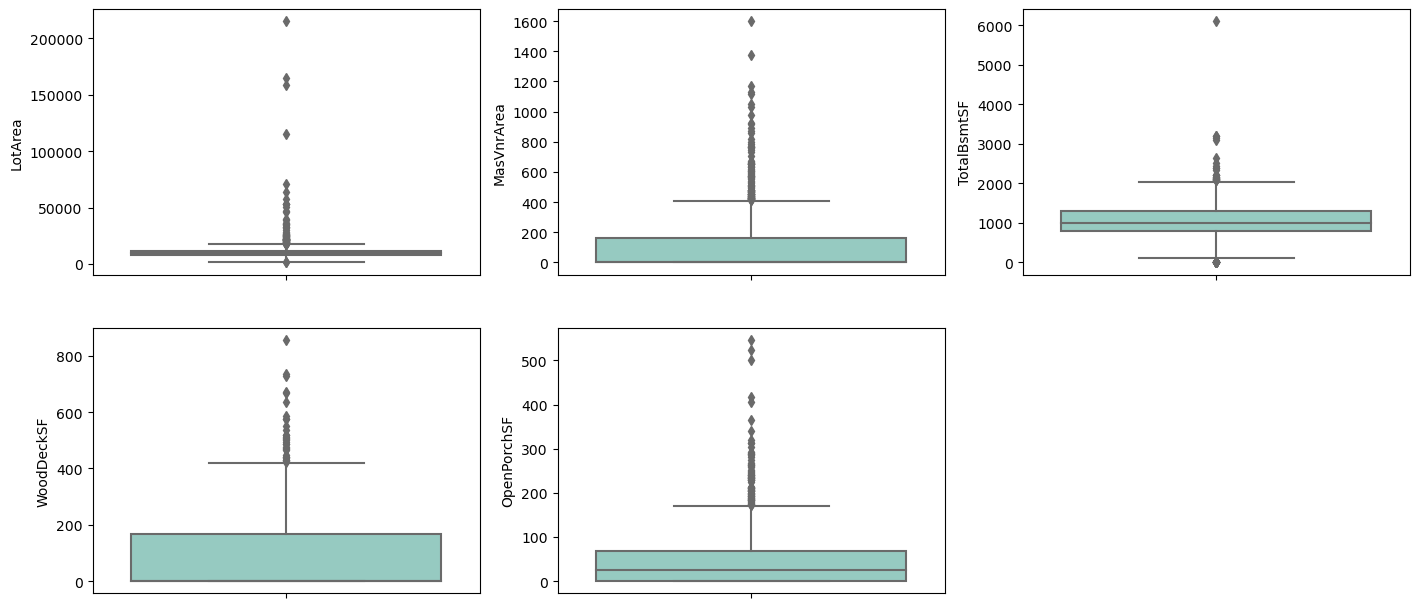

In [27]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = df)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = df)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = df)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = df)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = df)
plt.show()

In [28]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = df['LotArea'].quantile(0.98)
df = df[df["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = df['MasVnrArea'].quantile(0.98)
df = df[df["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = df['TotalBsmtSF'].quantile(0.99)
df = df[df["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = df['WoodDeckSF'].quantile(0.99)
df = df[df["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = df['OpenPorchSF'].quantile(0.99)

In [29]:
# Determine the percentage of data retained

num_data = round(100*(len(df)/1460),2)
print(num_data)


93.97


<Axes: xlabel='SalePrice', ylabel='Density'>

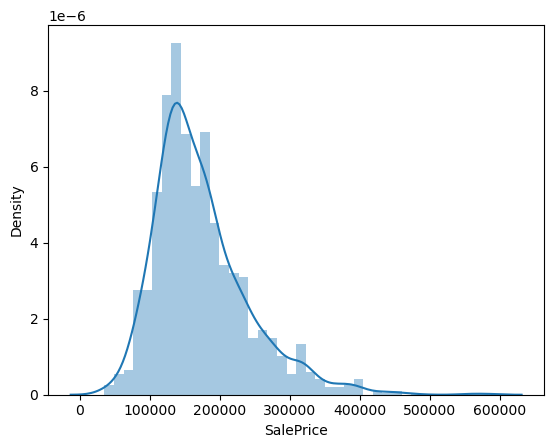

In [30]:
sns.distplot(df['SalePrice'])

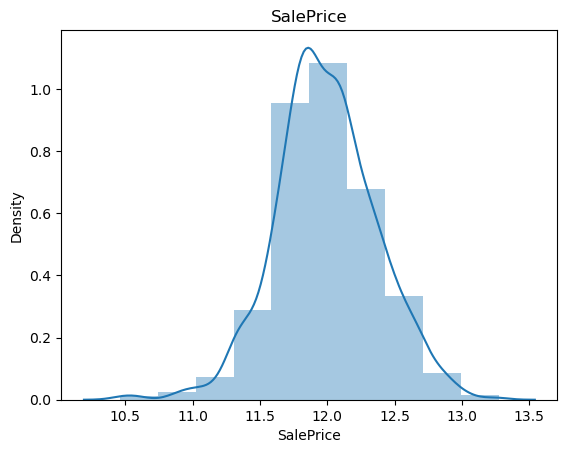

In [31]:
# Visualise the target variable -> SalePrice after transforming the sales price

df['SalePrice'] = np.log1p(df['SalePrice'])

plt.title('SalePrice')
sns.distplot(df['SalePrice'], bins=10)
plt.show()

In [32]:
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: -0.071717
Kurtosis: 0.704729


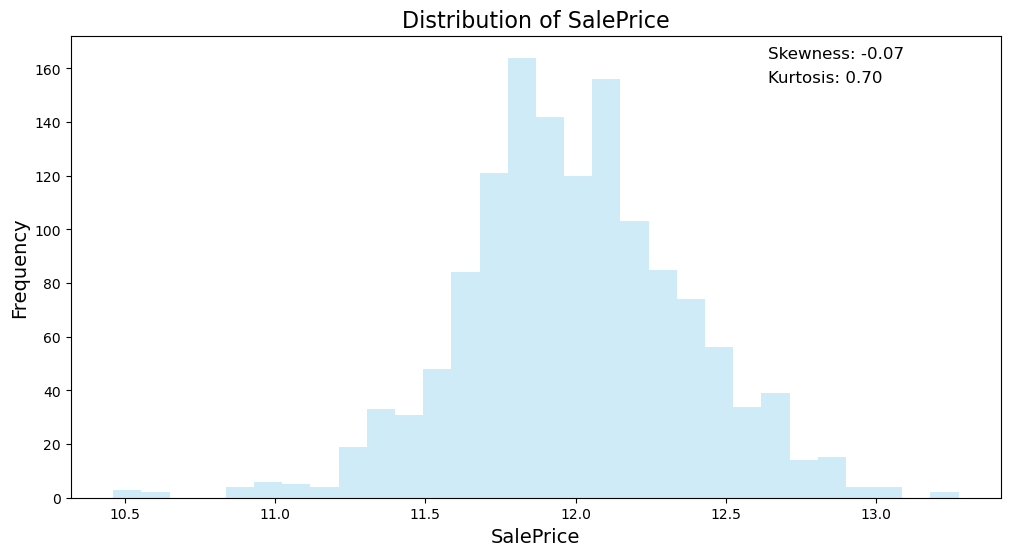

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Skewness and Kurtosis analysis with a distplot
plt.figure(figsize=(12, 6))

# Distribution plot
sns.distplot(df['SalePrice'], color='skyblue', kde=False, bins=30)
plt.title('Distribution of SalePrice', fontsize=16)
plt.xlabel('SalePrice', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Skewness and Kurtosis annotations
plt.annotate(f"Skewness: {df['SalePrice'].skew():.2f}", xy=(0.75, 0.95), xycoords="axes fraction", fontsize=12)
plt.annotate(f"Kurtosis: {df['SalePrice'].kurt():.2f}", xy=(0.75, 0.9), xycoords="axes fraction", fontsize=12)

plt.show()


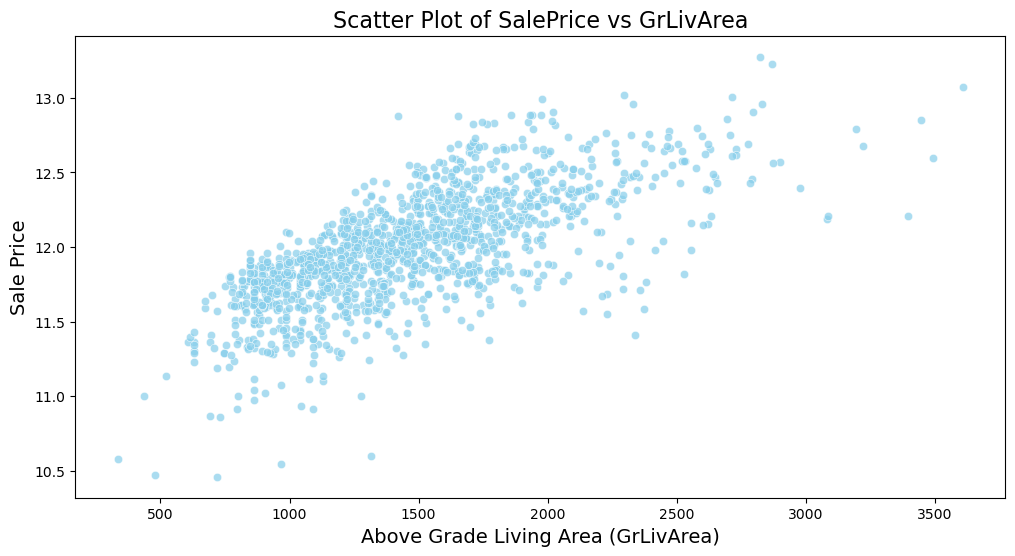

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
var = 'GrLivArea'
# Scatter plot with seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(x=var, y='SalePrice', data=df, alpha=0.7, color='skyblue')
plt.title('Scatter Plot of SalePrice vs GrLivArea', fontsize=16)
plt.xlabel('Above Grade Living Area (GrLivArea)', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)

plt.show()


In [35]:
# # Define the variable for the scatter plot
# var = 'TotalBsmtSF'

# # Create a DataFrame containing 'SalePrice' and the selected variable
# data = pd.concat([df['SalePrice'], df[var]], axis=1)

# # Generate a scatter plot
# plt.figure(figsize=(12, 6))
# sns.scatterplot(x=var, y='SalePrice', data=data, alpha=0.7, color='coral')
# plt.title('Scatter Plot of SalePrice vs Total Basement SF', fontsize=16)
# plt.xlabel('Total Basement Square Feet', fontsize=14)
# plt.ylabel('Sale Price', fontsize=14)
# plt.ylim(0, 800000)  # Set y-axis limit for better readability

# plt.show()


In [36]:
# # Define the variable for the box plot
# var = 'OverallQual'

# # Create a DataFrame containing 'SalePrice' and the selected variable
# data = pd.concat([df['SalePrice'], df[var]], axis=1)

# # Set up the plot
# plt.figure(figsize=(12, 8))
# sns.set(style="whitegrid")  # Set a white grid background for better readability

# # Generate a box plot
# sns.boxplot(x=var, y="SalePrice", data=data, palette="viridis")  # Use a color palette for better aesthetics
# plt.title('Box Plot of SalePrice vs Overall Quality', fontsize=16)
# plt.xlabel('Overall Quality', fontsize=14)
# plt.ylabel('Sale Price', fontsize=14)
# plt.ylim(0, 800000)  # Set y-axis limit for better readability

# plt.show()


<Figure size 1000x500 with 0 Axes>

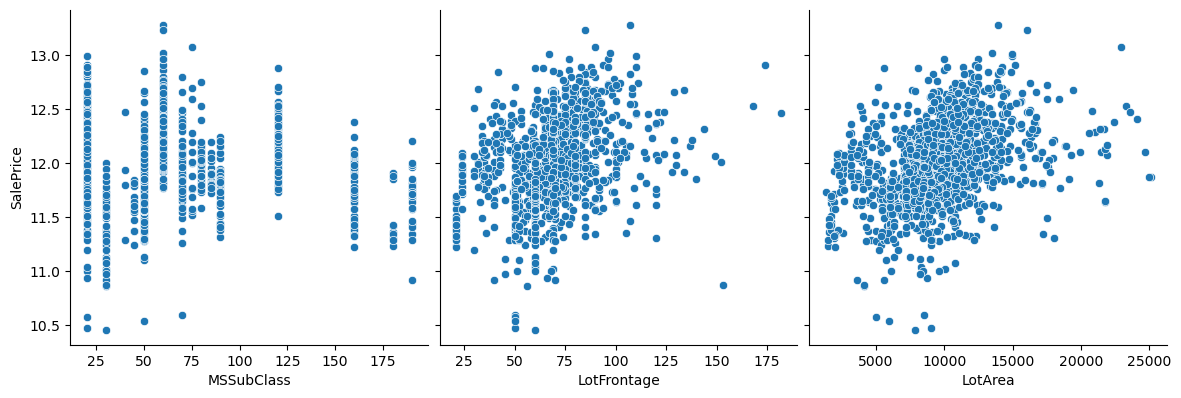

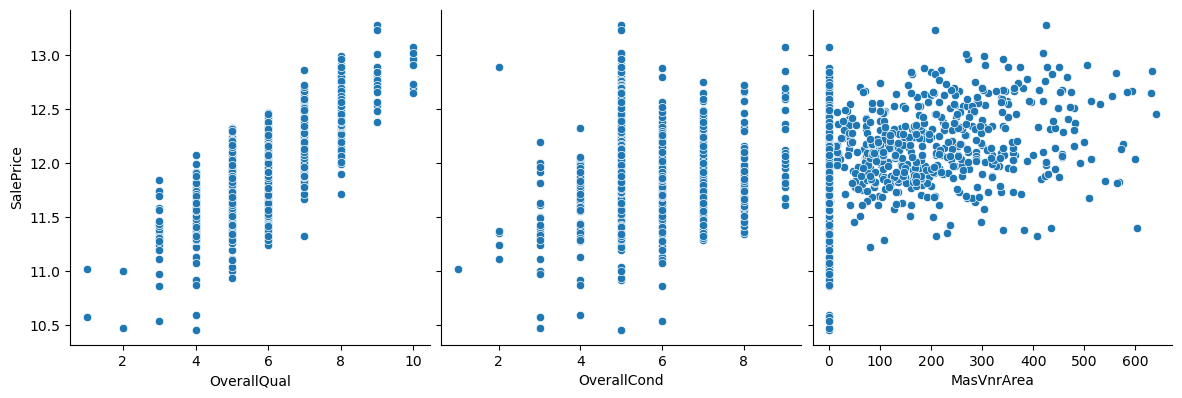

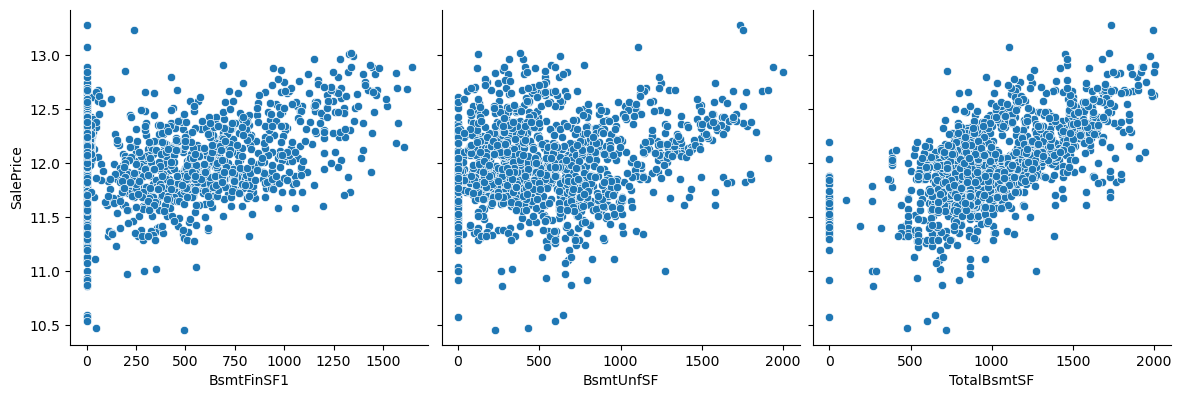

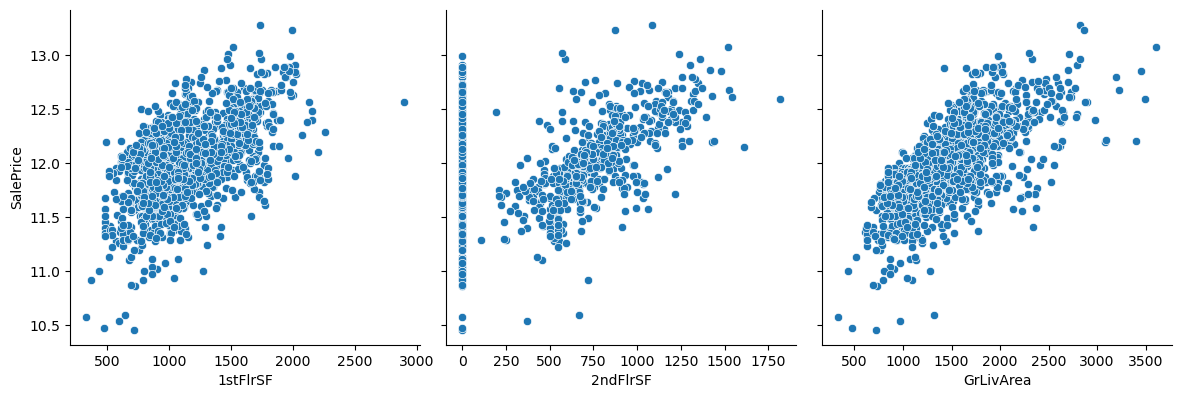

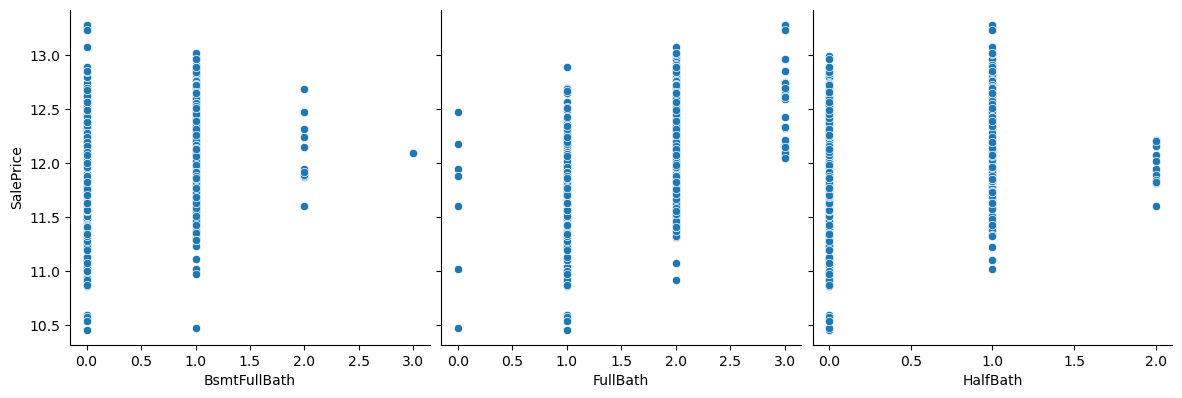

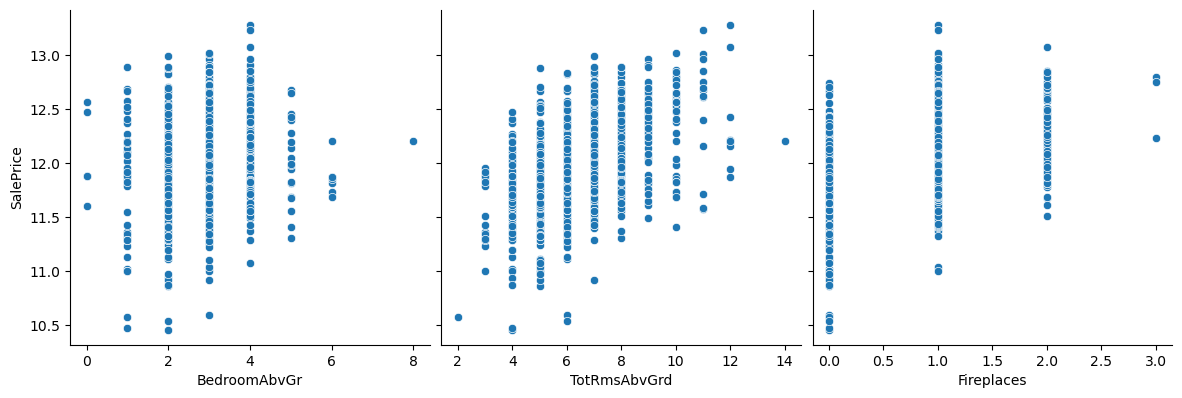

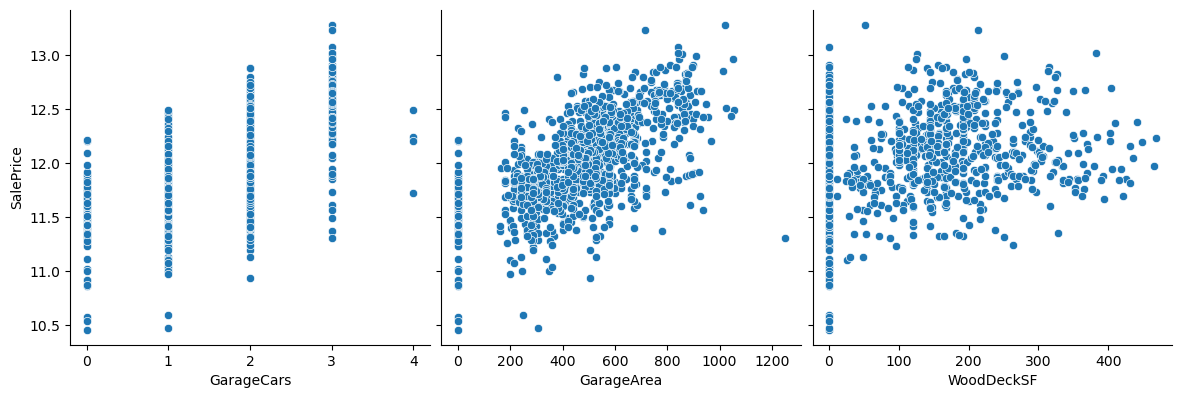

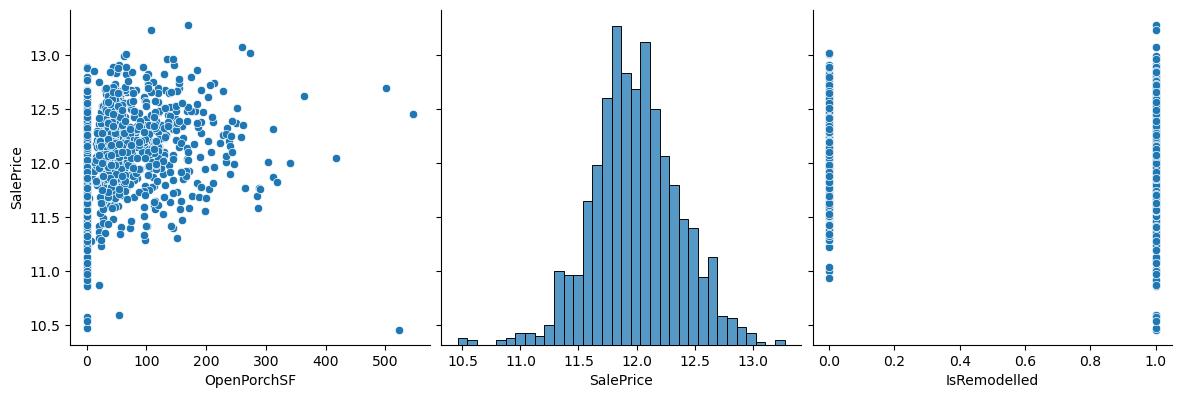

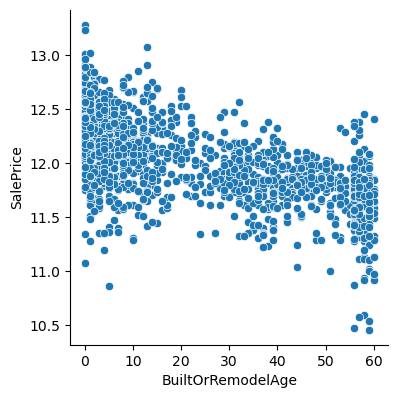

In [37]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(df, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BuiltOrRemodelAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

In [38]:
# Count of data types. return the count of unique occurrences in the dtypes column
df.dtypes.value_counts()

int64      24
object     22
float64     3
Name: count, dtype: int64

In [39]:
# Description of the data in the DataFrame
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,...,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,730.338921,57.226676,68.804665,9445.752915,6.021866,5.592566,83.448980,415.927843,558.065598,1018.647959,...,6.430758,0.576531,1.726676,459.549563,84.223761,44.791545,11.992431,0.476676,23.314869,0.274052
std,421.089356,42.327631,19.485723,3626.450352,1.322350,1.123726,133.938639,410.306359,428.759585,377.000286,...,1.579044,0.625827,0.737900,204.782099,108.606465,64.765505,0.376537,0.499638,20.811859,0.446198
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.460271,0.000000,0.000000,0.000000
25%,367.750000,20.000000,60.000000,7418.750000,5.000000,5.000000,0.000000,0.000000,218.750000,784.000000,...,5.000000,0.000000,1.000000,312.000000,0.000000,0.000000,11.763692,0.000000,4.000000,0.000000
50%,731.500000,50.000000,69.000000,9247.500000,6.000000,5.000000,0.000000,364.500000,479.500000,970.000000,...,6.000000,1.000000,2.000000,470.500000,0.000000,23.000000,11.976666,0.000000,15.000000,0.000000
75%,1093.250000,70.000000,78.000000,11256.250000,7.000000,6.000000,144.000000,686.000000,797.250000,1251.250000,...,7.000000,1.000000,2.000000,576.000000,160.000000,64.000000,12.230404,1.000000,42.000000,1.000000
max,1459.000000,190.000000,182.000000,25095.000000,10.000000,9.000000,640.000000,1646.000000,2002.000000,2006.000000,...,14.000000,3.000000,4.000000,1248.000000,468.000000,547.000000,13.275829,1.000000,60.000000,1.000000


In [40]:
# Check nulls once again

df.columns[df.isnull().any()] 

null_2 = df.isnull().sum()/len(df)*100
null_2 = null_2[null_2>0]
null_2.sort_values(inplace=True, ascending=False)
null_2

Series([], dtype: float64)

In [41]:
# Will check these columns one by one
df['LotFrontage'].describe()

count    1372.000000
mean       68.804665
std        19.485723
min        21.000000
25%        60.000000
50%        69.000000
75%        78.000000
max       182.000000
Name: LotFrontage, dtype: float64

In [42]:
df['MasVnrArea'].describe()


count    1372.000000
mean       83.448980
std       133.938639
min         0.000000
25%         0.000000
50%         0.000000
75%       144.000000
max       640.000000
Name: MasVnrArea, dtype: float64

In [43]:
# Crosscheck the updated 'LotFrontage' column
df['LotFrontage'].describe()

count    1372.000000
mean       68.804665
std        19.485723
min        21.000000
25%        60.000000
50%        69.000000
75%        78.000000
max       182.000000
Name: LotFrontage, dtype: float64

In [44]:
df['MasVnrArea'].describe()


count    1372.000000
mean       83.448980
std       133.938639
min         0.000000
25%         0.000000
50%         0.000000
75%       144.000000
max       640.000000
Name: MasVnrArea, dtype: float64

In [45]:
# Check the no. of rows retained
len(df.index)
len(df.index)/1460

0.9397260273972603

In [46]:
# EDA on the cleaned data
#All numeric (float and int) variables in the dataset
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,65.0,8450,7,5,196.0,706,150,856,...,8,0,2,548,0,61,12.247699,0,5,1
1,2,20,80.0,9600,6,8,0.0,978,284,1262,...,6,1,2,460,298,0,12.109016,0,31,0
2,3,60,68.0,11250,7,5,162.0,486,434,920,...,6,1,2,608,0,42,12.317171,1,6,1
3,4,70,60.0,9550,7,5,0.0,216,540,756,...,7,1,3,642,0,35,11.849405,1,36,0
4,5,60,84.0,14260,8,5,350.0,655,490,1145,...,9,1,3,836,192,84,12.429220,0,8,1


In [47]:
# Dropping ID Column
df_numeric = df_numeric.drop(['Id'], axis=1)
df_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,8,0,2,548,0,61,12.247699,0,5,1
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,6,1,2,460,298,0,12.109016,0,31,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,6,1,2,608,0,42,12.317171,1,6,1
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,7,1,3,642,0,35,11.849405,1,36,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,9,1,3,836,192,84,12.429220,0,8,1


In [48]:
#Log Transformation
df['SalePrice']=np.log1p(df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

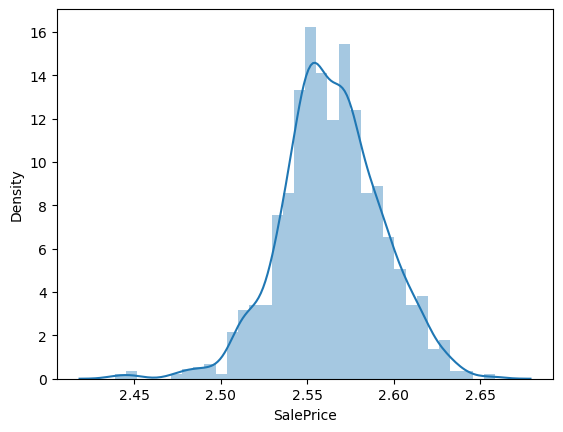

In [49]:
sns.distplot(df['SalePrice'])


In [50]:
# correlation matrix
cor = df_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
MSSubClass,1.000000,-0.398016,-0.390106,0.059009,-0.059350,0.029452,-0.068255,-0.128826,-0.243984,-0.252058,...,0.052754,-0.031426,-0.037948,-0.101725,-0.031167,0.007941,-0.056913,-0.049880,-0.049524,0.039499
LotFrontage,-0.398016,1.000000,0.574684,0.186796,-0.051572,0.159019,0.112693,0.135544,0.291488,0.343950,...,0.296782,0.201599,0.273818,0.305375,0.077778,0.122347,0.340266,-0.044221,-0.067551,0.077050
LotArea,-0.390106,0.574684,1.000000,0.169453,-0.003538,0.090299,0.145234,0.088548,0.290215,0.391039,...,0.362451,0.309514,0.260091,0.297652,0.132859,0.131129,0.380156,0.006861,-0.039804,-0.019420
OverallQual,0.059009,0.186796,0.169453,1.000000,-0.078919,0.361414,0.185521,0.289734,0.503697,0.427884,...,0.387771,0.378732,0.583957,0.539494,0.222234,0.302823,0.810987,-0.099690,-0.547603,0.560960
OverallCond,-0.059350,-0.051572,-0.003538,-0.078919,1.000000,-0.127197,-0.018571,-0.138127,-0.161088,-0.134409,...,-0.045713,-0.004895,-0.174862,-0.130928,0.003981,-0.032407,-0.016937,0.317584,-0.074197,-0.289202
MasVnrArea,0.029452,0.159019,0.090299,0.361414,-0.127197,1.000000,0.214911,0.083640,0.305059,0.297058,...,0.233400,0.218794,0.336024,0.336085,0.124069,0.120632,0.375481,-0.166102,-0.143484,0.165547
BsmtFinSF1,-0.068255,0.112693,0.145234,0.185521,-0.018571,0.214911,1.000000,-0.560423,0.425724,0.344598,...,-0.045252,0.200730,0.190084,0.227817,0.191286,0.055062,0.346514,-0.127662,-0.120089,0.009817
BsmtUnfSF,-0.128826,0.135544,0.088548,0.289734,-0.138127,0.083640,-0.560423,1.000000,0.435236,0.312713,...,0.244634,0.043080,0.202985,0.177046,-0.037454,0.123345,0.206480,0.032908,-0.174254,0.335399
TotalBsmtSF,-0.243984,0.291488,0.290215,0.503697,-0.161088,0.305059,0.425724,0.435236,1.000000,0.771573,...,0.213714,0.277901,0.421661,0.443984,0.200122,0.206696,0.609689,-0.107830,-0.300741,0.326796
1stFlrSF,-0.252058,0.343950,0.391039,0.427884,-0.134409,0.297058,0.344598,0.312713,0.771573,1.000000,...,0.360644,0.359910,0.420649,0.449045,0.187750,0.163088,0.577921,-0.040739,-0.240501,0.216274


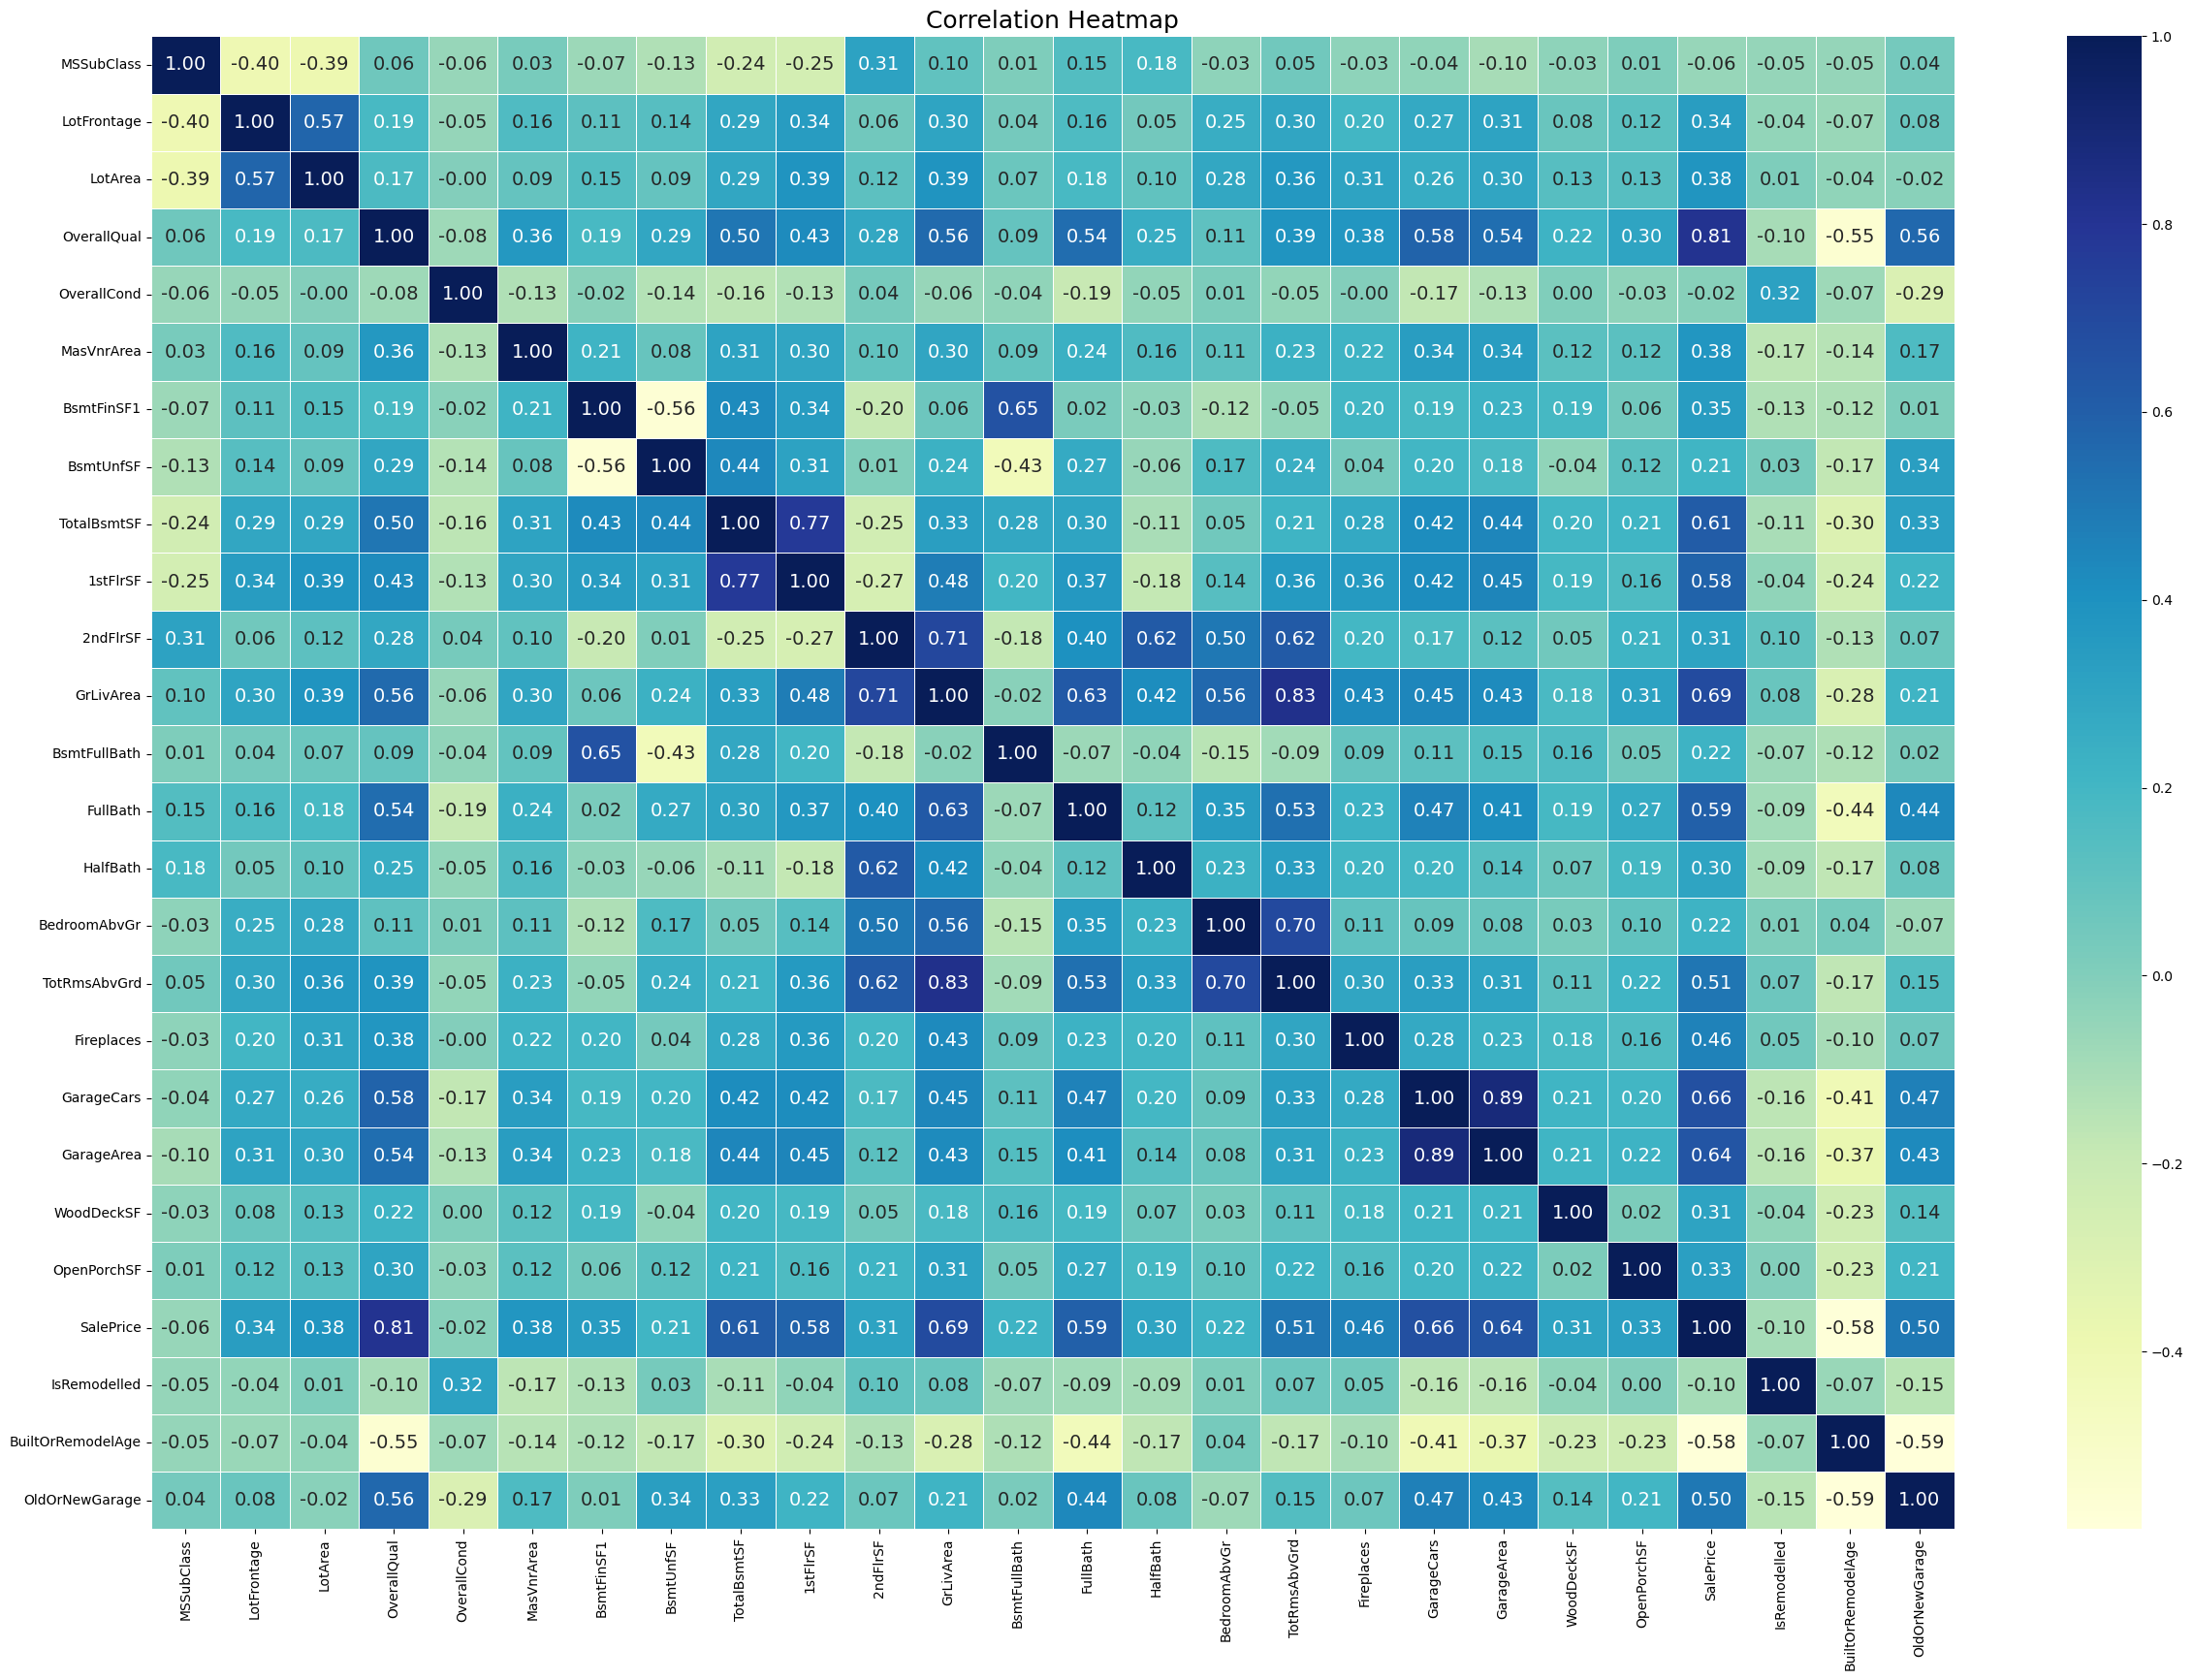

In [51]:
# plotting correlations on a heatmap with enhanced aesthetics

# figure size
plt.figure(figsize=(30, 20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True, linewidths=.5, fmt=".2f", annot_kws={"size": 14})
plt.title("Correlation Heatmap", fontsize=18)
plt.show()


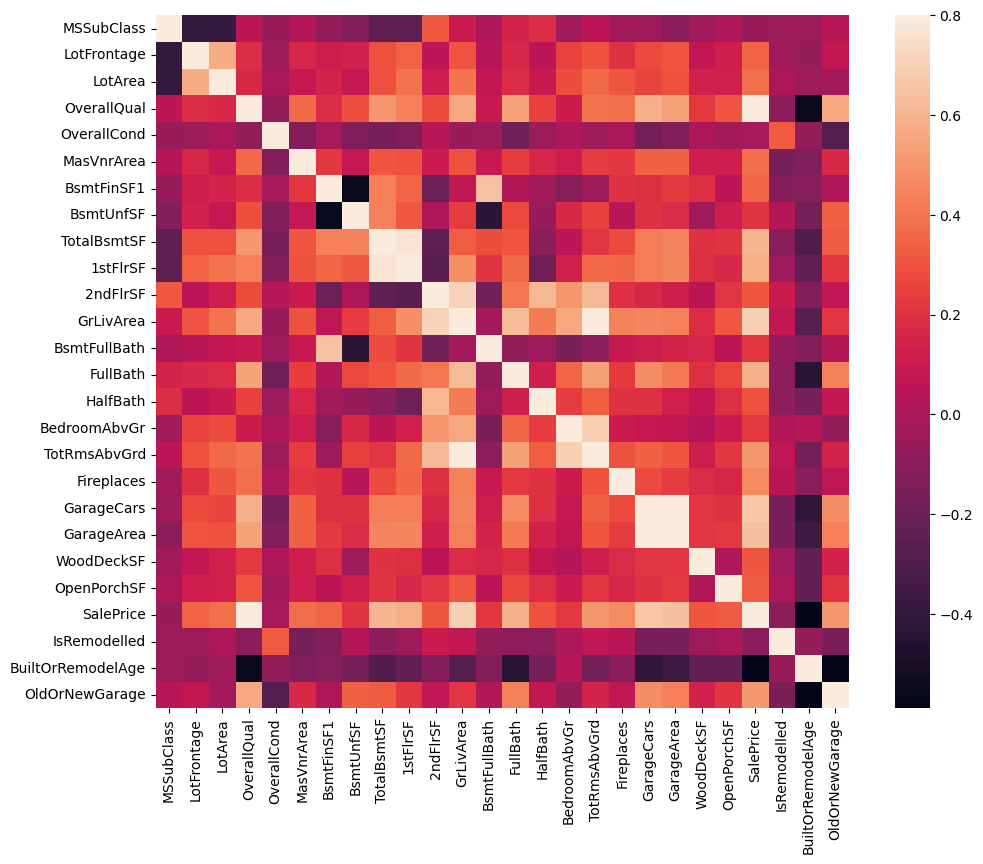

In [52]:
#correlation matrix
corrmat = df_numeric.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [53]:
# Removing following columns which shows high correlation
# - TotRmsAbvGrd and GrLivArea show 82%
# - Garage Area and Garage Cars show 88%
# Hence dropping TotRmsAbvGrd and Garage Cars
# Removing the highly correlated variables

df.drop(['GarageArea'], axis = 1, inplace = True)

In [54]:
# Check the shape of the dataframe

df.shape

(1372, 48)

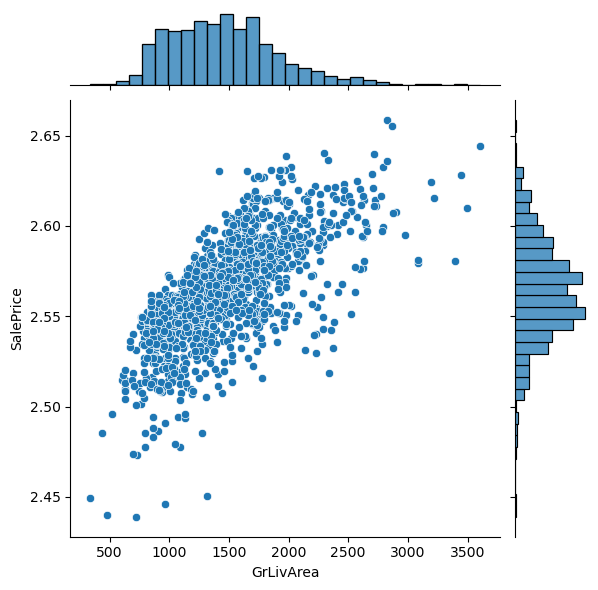

In [55]:
# Analyse some important numeric columns
sns.jointplot(x='GrLivArea', y='SalePrice', data=df)
plt.show()

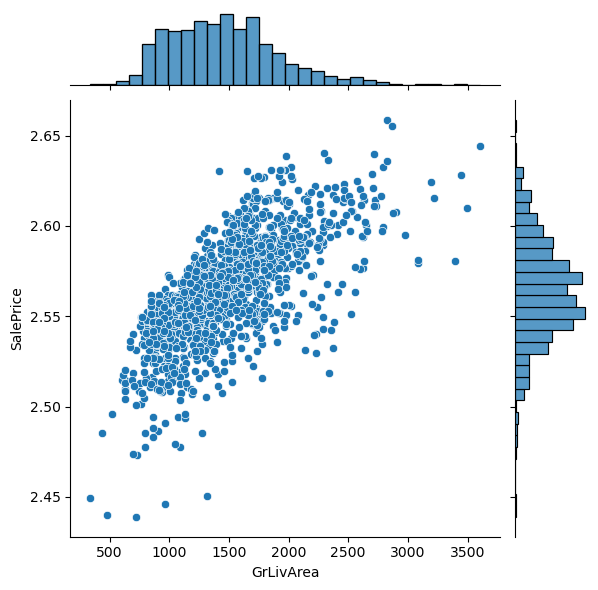

In [56]:
# Again plotting GeLivArea vs SalePrice
sns.jointplot(x = df['GrLivArea'], y = df['SalePrice'])
plt.show()

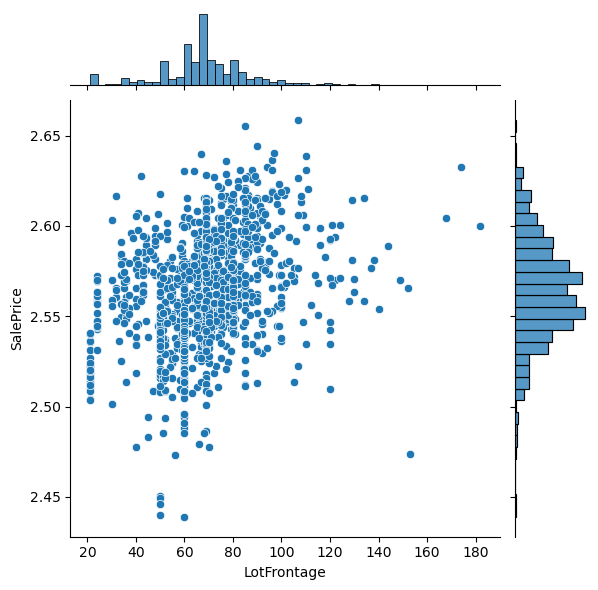

In [57]:
# Lot frontage vs SalePrice 
sns.jointplot(x = df['LotFrontage'], y = df['SalePrice'])
plt.show()

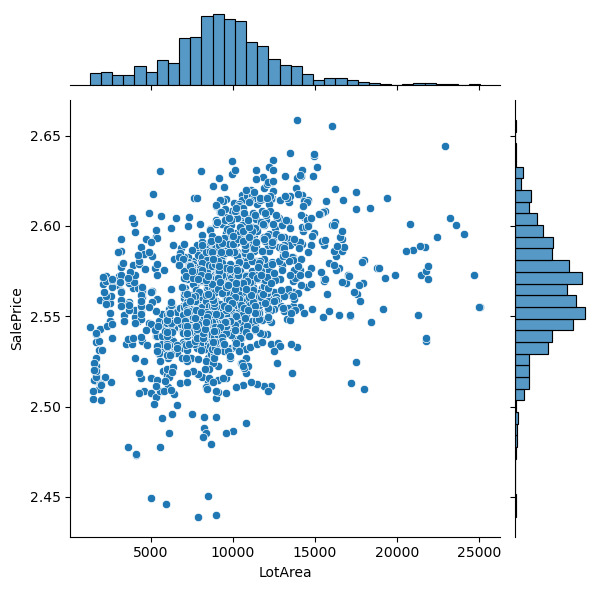

In [58]:
# LotArea vs SalePrice
sns.jointplot(x = df['LotArea'], y = df['SalePrice'])
plt.show()

In [59]:
# As per data dictionary, the column MSSubClass has categorical values with interger data type. Therefore, change the datatype to object
# Change the data type from Integer to object
df['MSSubClass']=df['MSSubClass'].astype('object')

In [60]:
# Handling Numerical columns with value 0
# Identify columns containing at least one zero in the DataFrame
#zero_cols is a list of column names in the DataFrame df that contain at least one zero.

zero_cols=df.columns[df.eq(0).any()]
zero_cols

Index(['MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'IsRemodelled',
       'BuiltOrRemodelAge', 'OldOrNewGarage'],
      dtype='object')

In [61]:
# Replace 0 with null value
df[zero_cols]=df[zero_cols].replace(0,np.NaN )

In [62]:
## Handling Missing Values:

# Identify columns with missing values (use functions like isnull() or info()).
# Decide whether to drop columns with too many missing values or impute missing values.
# For categorical variables with missing values (e.g., Alley, FireplaceQu, PoolQC, Fence, MiscFeature), consider using a placeholder like 'Unknown' for the missing values.

In [63]:
#Percentage of missing values
round((df[df.columns[df.isnull().any()]].isnull().sum()/len(df))*100,2).sort_values(ascending=False)

OldOrNewGarage       72.59
HalfBath             63.85
MasVnrArea           61.01
BsmtFullBath         59.99
2ndFlrSF             57.00
WoodDeckSF           53.57
IsRemodelled         52.33
Fireplaces           49.49
OpenPorchSF          46.14
BsmtFinSF1           32.80
BsmtUnfSF             8.45
BuiltOrRemodelAge     8.02
GarageCars            5.90
TotalBsmtSF           2.70
FullBath              0.58
BedroomAbvGr          0.36
dtype: float64

In [64]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
OldOrNewGarage,996,0.725948
HalfBath,876,0.638484
MasVnrArea,837,0.610058
BsmtFullBath,823,0.599854
2ndFlrSF,782,0.569971
WoodDeckSF,735,0.535714
IsRemodelled,718,0.523324
Fireplaces,679,0.494898
OpenPorchSF,633,0.461370
BsmtFinSF1,450,0.327988


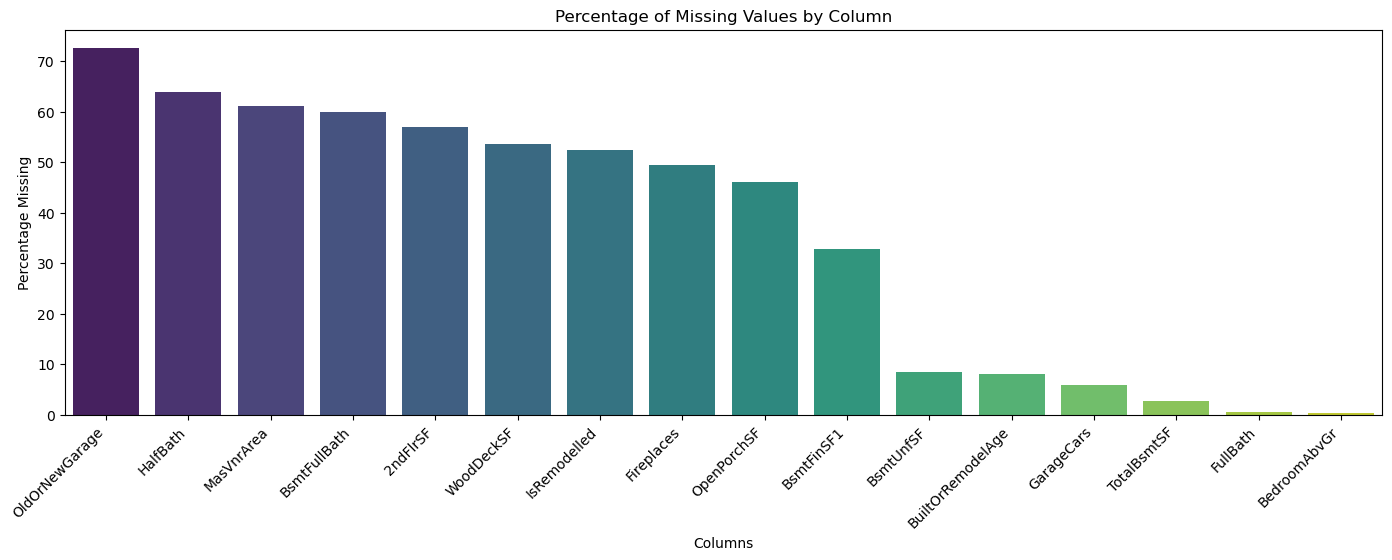

In [65]:
# Barplot for Percentages of missing values
 # generates a bar plot that visualizes the percentage of missing values for each column in a DataFrame (df)
import seaborn as sns  # Import seaborn for better aesthetics

# Barplot for Percentages of missing values
plt.figure(figsize=[17, 5])
missing_percentages = round((df[df.columns[df.isnull().any()]].isnull().sum() / len(df)) * 100, 2).sort_values(ascending=False)
sns.barplot(x=missing_percentages.index, y=missing_percentages.values, palette="viridis")
plt.title("Percentage of Missing Values by Column")
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.show()

In [66]:
# Observations:

# There are few columns with missing values more than 30%. Therefore, drop null values by columns.
# LotFrontage null values can be imputed with median.
# Garage columns has same percentage of missing values. Therefore, drop null values by rows.
# Basement columns has same percentage of missing values. Therefore, drop null values by rows.
# Masonry columns has same percentage of missing values. Therefore, drop null values by rows.



In [67]:
# Drop columns having missing values >30%
# List of columns with missing values >30%
miss_cols=df.columns[(df.isnull().sum()/len(df)*100>30)]
miss_cols

Index(['MasVnrArea', 'BsmtFinSF1', '2ndFlrSF', 'BsmtFullBath', 'HalfBath',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'IsRemodelled',
       'OldOrNewGarage'],
      dtype='object')

In [68]:
#Drop columns with missing values >30%
df.drop(miss_cols,axis=1, inplace=True)
df.shape

(1372, 38)

In [69]:
#LotFrontage
df['LotFrontage'].describe()


count    1372.000000
mean       68.804665
std        19.485723
min        21.000000
25%        60.000000
50%        69.000000
75%        78.000000
max       182.000000
Name: LotFrontage, dtype: float64

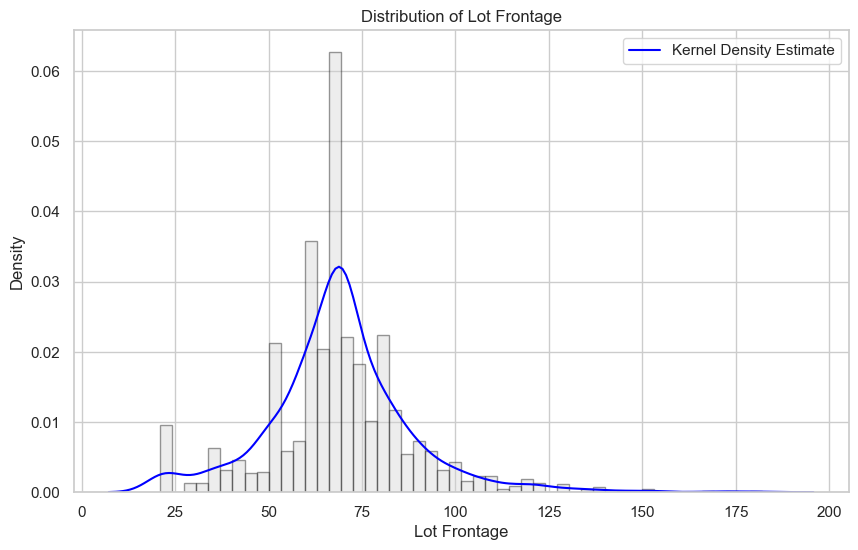

In [70]:
# Plot distribution with enhanced aesthetics
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Set a white grid background for better readability

sns.distplot(df['LotFrontage'], kde_kws={"color": "blue", "label": "Kernel Density Estimate"}, hist_kws={"color": "lightgrey", "edgecolor": "black"})
plt.title("Distribution of Lot Frontage")
plt.xlabel("Lot Frontage")
plt.ylabel("Density")
plt.legend()  # Show legend for KDE
plt.show()


In [71]:
#Impute LotFrontage missing values with median
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

In [72]:
#Garage Columns
garage_cols=['GarageYrBlt','GarageType','GarageFinish','GarageQual','GarageCond']
garage_cols


['GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

In [73]:
#Basement Columns
df.columns[df.isnull().any()]



Index(['BsmtUnfSF', 'TotalBsmtSF', 'FullBath', 'BedroomAbvGr', 'GarageCars',
       'BuiltOrRemodelAge'],
      dtype='object')

In [74]:
basement_cols=['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2','BsmtUnfSF']
basement_cols

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtUnfSF']

In [75]:
df.shape

(1372, 38)

In [76]:
other_cols=df.columns[df.isnull().any()]
other_cols

Index(['BsmtUnfSF', 'TotalBsmtSF', 'FullBath', 'BedroomAbvGr', 'GarageCars',
       'BuiltOrRemodelAge'],
      dtype='object')

In [77]:
# Drop null values by rows
df.dropna(subset=other_cols, inplace=True)

In [78]:
df.shape


(1081, 38)

In [79]:
#Verify missing value treatment
df.isnull().sum()

Id                   0
MSSubClass           0
MSZoning             0
LotFrontage          0
LotArea              0
LotShape             0
LotConfig            0
Neighborhood         0
BldgType             0
HouseStyle           0
OverallQual          0
OverallCond          0
RoofStyle            0
Exterior1st          0
Exterior2nd          0
MasVnrType           0
ExterQual            0
Foundation           0
BsmtQual             0
BsmtExposure         0
BsmtFinType1         0
BsmtUnfSF            0
TotalBsmtSF          0
HeatingQC            0
1stFlrSF             0
GrLivArea            0
FullBath             0
BedroomAbvGr         0
KitchenQual          0
TotRmsAbvGrd         0
FireplaceQu          0
GarageType           0
GarageFinish         0
GarageCars           0
Fence                0
SaleCondition        0
SalePrice            0
BuiltOrRemodelAge    0
dtype: int64

In [80]:
# Handling Categorical Variables:

# Convert categorical variables into numerical format using one-hot encoding or label encoding.
# For ordinal variables (e.g., ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, HeatingQC, KitchenQual, FireplaceQu, GarageQual, GarageCond, PoolQC, Fence), convert them to numeric values based on their order.
# Drop Date, Year and Month columns as dataset may suffer high dimensionality problem if we create dummies of these columns

date_cols=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold']
date_cols

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold']

In [81]:
#Create dummies for categorical variables

#Create a list of categorical variables
cat_cols=df.select_dtypes('object').columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'Fence', 'SaleCondition'],
      dtype='object')

In [82]:
# New dataframe of dummies
df_dum=pd.get_dummies(df[cat_cols],drop_first=True)

In [83]:
df_dum.head()


,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [84]:
df_dum.shape

(1081, 142)

In [85]:
#Concatenate dummies data frame with original data frame
# Drop original columns of categorical variables
df=pd.concat([df,df_dum], axis=1)
df.shape


(1081, 180)

In [86]:
# Drop original columns of categorical variables
df.drop(cat_cols, axis=1, inplace=True)
df.shape

(1081, 157)

In [87]:
# Drop id column as it is not a significant predictor
df.drop('Id', axis=1, inplace=True)
df.shape

(1081, 156)

In [88]:
# Feature Scaling:

# Standardize or normalize numerical features, especially if you choose Lasso Regression, which performs feature selection and is sensitive to feature scales.

In [89]:
# Check and Handle Multicollinearity:

# Check for multicollinearity, though Ridge Regression is less sensitive. Use methods like VIF to address multicollinearity if needed.

In [90]:
# Check for Homoscedasticity:

# Check residuals for homoscedasticity, especially if you are applying Ridge or Lasso Regression.

In [91]:
#Split data frame into train and test sets
from sklearn.model_selection import train_test_split

In [92]:
#Split train and test sets
df_train, df_test=train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [93]:
print('Train shape', df_train.shape)
print('Test shape', df_test.shape)

Train shape (756, 156)
Test shape (325, 156)


In [94]:
#Rescaling Numerical Variables
num_cols=df.select_dtypes(exclude='uint8').columns
num_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr',
       ...
       'GarageFinish_Unf', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw',
       'Fence_None', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=156)

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
scaler=MinMaxScaler()

In [97]:
df_train[num_cols]=scaler.fit_transform(df_train[num_cols])
df_test[num_cols]=scaler.transform(df_test[num_cols])

In [98]:
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,...,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1357,0.298137,0.472242,0.285714,0.571429,0.171786,0.517278,0.345128,0.156479,0.0,0.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
911,0.298137,0.335617,0.285714,0.714286,0.550755,0.618288,0.455336,0.222843,0.0,0.4,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1286,0.298137,0.356798,0.428571,0.428571,0.345653,0.650186,0.490139,0.243800,0.0,0.4,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
785,0.298137,0.356798,0.428571,0.428571,0.248308,0.673578,0.498260,0.248690,0.5,0.4,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
666,0.298137,0.720740,0.428571,0.428571,0.050495,0.486975,0.569606,0.611247,0.5,0.4,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [99]:
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,...,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
186,0.298137,0.363396,0.571429,0.428571,0.293077,0.575758,0.425754,0.205030,0.5,0.4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1393,0.242236,0.399244,0.428571,0.714286,0.243623,0.200425,0.428074,0.447782,0.5,0.4,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1319,0.335404,0.374659,0.142857,0.428571,0.186361,0.403509,0.269722,0.111072,0.0,0.4,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1155,0.428571,0.397899,0.285714,0.857143,0.138470,0.708134,0.553364,0.281872,0.5,0.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1114,0.428571,0.172305,0.285714,0.714286,0.210307,0.387028,0.203016,0.070905,0.0,0.2,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [100]:
#Divide train set into X and Y sets
y_train=df_train.pop('SalePrice')
x_train=df_train

In [101]:
print('y_train shape', y_train.shape)
print('x_train shape', x_train.shape)

y_train shape (756,)
x_train shape (756, 155)


In [102]:
y_test=df_test.pop('SalePrice')
x_test=df_test

In [103]:
print('y_test shape', y_test.shape)
print('x_test shape', x_test.shape)

y_test shape (325,)
x_test shape (325, 155)


In [104]:
#Model Building

In [105]:
#Model using Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [106]:
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [107]:
y_train_pred=lr.predict(x_train)

In [108]:
#Model Evaluation on train set

r2_score(y_train,y_train_pred)

0.9283146616465592

In [109]:
mean_squared_error(y_train,y_train_pred)

0.0013913629064894017

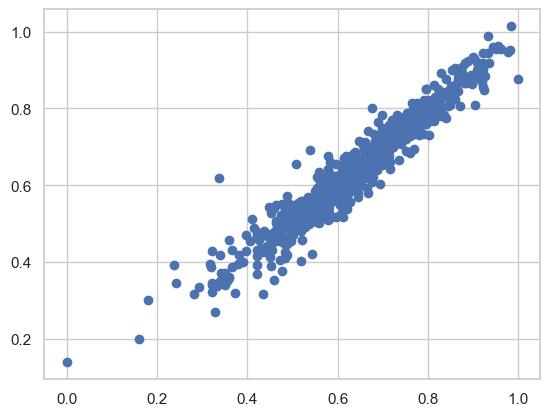

In [110]:
plt.scatter(y_train,y_train_pred)
plt.show()

In [111]:
#Model Evaluation on test set

y_test_pred=lr.predict(x_test)

In [112]:
r2_score(y_test,y_test_pred)

-5.346266976101898e+22

In [113]:
mean_squared_error(y_test,y_test_pred)

1.0913123068748717e+21

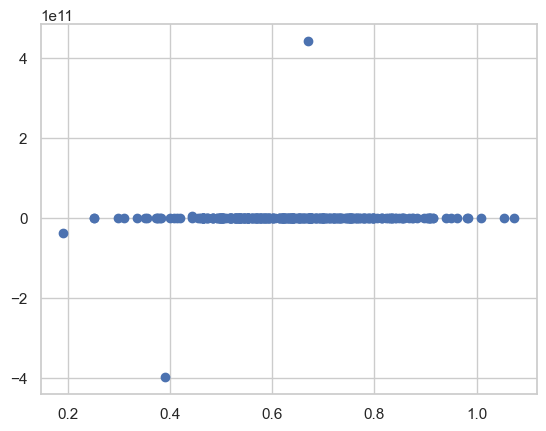

In [114]:
plt.scatter(y_test,y_test_pred)
plt.show()

In [115]:
#Model using Ridge Regression


In [116]:
from sklearn.linear_model import Ridge

In [117]:
#List of lambda values for iteration
lambdas=[0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [118]:
for lam in lambdas:
    ridge=Ridge(alpha=lam)
    ridge.fit(x_train, y_train)
    y_train_pred=ridge.predict(x_train)
    print(lam,'------',r2_score(y_train, y_train_pred))

0 ------ 0.9281447522935936
0.001 ------ 0.9285736302173546
0.01 ------ 0.9285495283752556
0.1 ------ 0.9275518027697498
1 ------ 0.9188453987936832
10 ------ 0.8919858481581667
100 ------ 0.787452621573687
1000 ------ 0.5421764628436396


In [119]:
ridge=Ridge(alpha=0.01)
ridge.fit(x_train, y_train)

Ridge(alpha=0.01)

In [120]:
y_train_pred=ridge.predict(x_train)

In [121]:
#Model Evaluation on train set



In [122]:
r2_score(y_train, y_train_pred)

0.9285495283752556

In [123]:
mean_squared_error(y_train, y_train_pred)

0.0013868043055009342

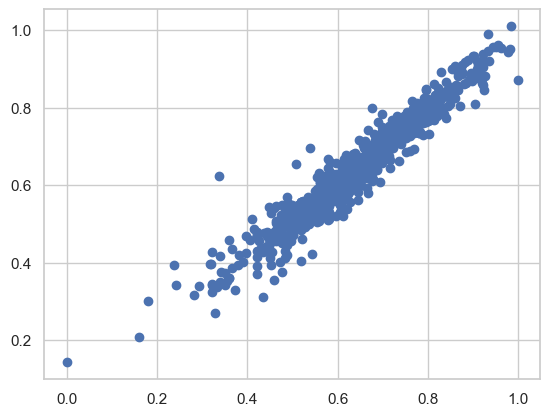

In [124]:
plt.scatter(y_train, y_train_pred)
plt.show()

In [125]:
#Model Evaluation on test set



In [126]:
y_test_pred=ridge.predict(x_test)

In [127]:
r2_score(y_test, y_test_pred)

0.846546491906427

In [128]:
mean_squared_error(y_test, y_test_pred)

0.0031323856938723746

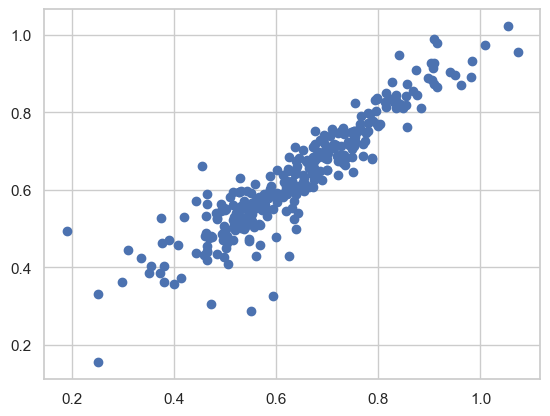

In [129]:
plt.scatter(y_test, y_test_pred)
plt.show()

In [130]:
#Model using Lasso Regression
from sklearn.linear_model import Lasso

In [131]:
for lam in lambdas:
    lasso=Lasso(alpha=lam)
    lasso.fit(x_train, y_train)
    y_train_pred=lasso.predict(x_train)
    print(lam,'------',r2_score(y_train, y_train_pred))

0 ------ 0.928573272032873
0.001 ------ 0.8739791165029911
0.01 ------ 0.563501140569225
0.1 ------ 0.0
1 ------ 0.0
10 ------ 0.0
100 ------ 0.0
1000 ------ 0.0


In [132]:
lasso=Lasso(alpha=0)
lasso.fit(x_train, y_train)

Lasso(alpha=0)

In [133]:
y_train_pred=lasso.predict(x_train)

In [134]:
#Model Evaluation on train set

r2_score(y_train, y_train_pred)

0.928573272032873

In [135]:
mean_squared_error(y_test, y_test_pred)

0.0031323856938723746

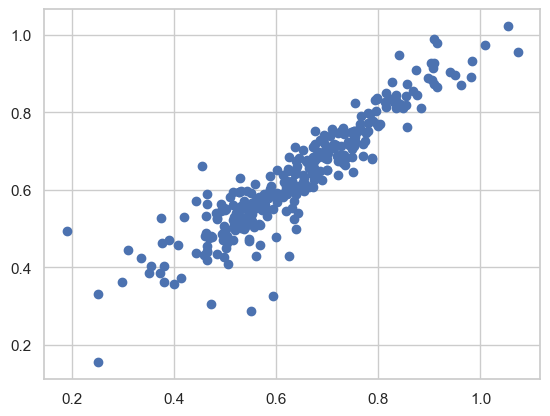

In [136]:
plt.scatter(y_test, y_test_pred)
plt.show()

In [137]:
#Model Evaluation on test set



In [138]:
y_test_pred=lasso.predict(x_test)

In [139]:
r2_score(y_test, y_test_pred)

0.8394384462876768

In [140]:
mean_squared_error(y_test, y_test_pred)

0.0032774794143364773

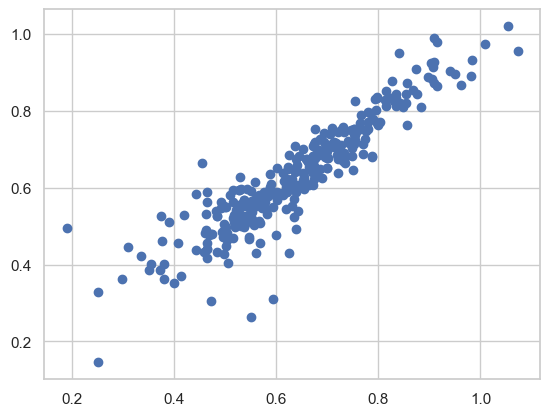

In [141]:
plt.scatter(y_test, y_test_pred)
plt.show()

In [142]:
# Train Test Split
# Putting all feature variable to X

X = df.drop(['SalePrice'], axis=1)
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,...,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,150.0,856.0,856,1710,2.0,3.0,...,False,False,False,False,True,False,False,False,True,False
1,80.0,9600,6,8,284.0,1262.0,1262,1262,2.0,3.0,...,False,False,False,False,True,False,False,False,True,False
2,68.0,11250,7,5,434.0,920.0,920,1786,2.0,3.0,...,False,False,False,False,True,False,False,False,True,False
3,60.0,9550,7,5,540.0,756.0,961,1717,1.0,3.0,...,True,False,False,False,True,False,False,False,False,False
4,84.0,14260,8,5,490.0,1145.0,1145,2198,2.0,4.0,...,False,False,False,False,True,False,False,False,True,False


In [143]:
# Putting response variable to y

y = df['SalePrice']
y.head()

0    2.583824
1    2.573300
2    2.589054
3    2.553297
4    2.597433
Name: SalePrice, dtype: float64

In [144]:
# Scaling the features
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr',
       ...
       'GarageFinish_Unf', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw',
       'Fence_None', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=155)

In [145]:
# split into train and test


from sklearn.model_selection import train_test_split


np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

In [146]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Create a linear regression model
lm = LinearRegression()

# Running RFE without specifying the number of features initially
rfe = RFE(estimator=lm)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Select the top 50 features based on RFE ranking
selected_features = X_train.columns[rfe.ranking_ == 1].tolist()

# Display the selected features
print(selected_features)


['LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'BuiltOrRemodelAge', 'MSSubClass_30', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_80', 'MSSubClass_90', 'MSSubClass_160', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_FR2', 'Neighborhood_BrDale', 'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Timber', 'BldgType_Duplex', 'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_HdBoard', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exter

In [147]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtUnfSF,True,1
4,TotalBsmtSF,True,1
...,...,...,...
72,KitchenQual_TA,True,1
73,FireplaceQu_Gd,True,1
74,FireplaceQu_TA,True,1
75,SaleCondition_Alloca,True,1


In [148]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [149]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [150]:
# Model Building and Evaluation - to get list of Key Factors Affecting the Model. 

In [151]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [152]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
17,6.0,-0.005023,-0.005833,1
16,5.0,-0.005014,-0.005833,2
15,4.0,-0.005005,-0.005834,3
14,3.0,-0.004996,-0.005836,4
18,7.0,-0.005032,-0.005841,5
13,2.0,-0.004989,-0.005841,6
19,8.0,-0.005041,-0.005849,7
12,1.0,-0.004982,-0.005850,8
11,0.9,-0.004981,-0.005851,9
10,0.8,-0.004981,-0.005853,10


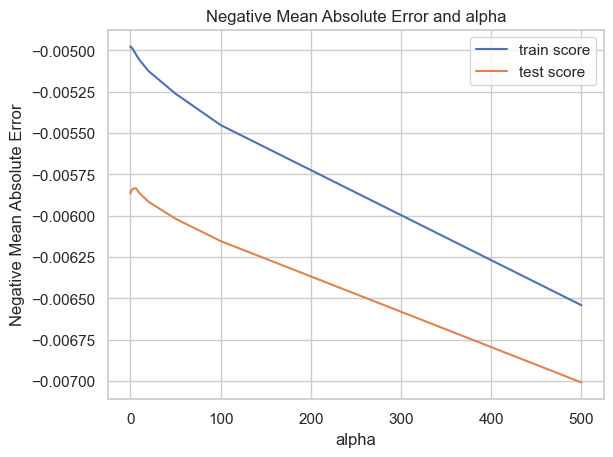

In [153]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [154]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=6.0)

In [184]:
# check the coefficient values with lambda = 6

alpha = 6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 2.10285308e-03,  4.65080409e-03,  3.84714993e-03, -1.50666217e-03,
        4.81515176e-03, -7.20352147e-04,  8.18089020e-03,  8.53809336e-04,
        2.00449171e-03, -1.69971723e-03, -1.89491588e-03, -1.01009663e-03,
       -1.30407898e-03,  9.79017692e-04, -1.17649685e-03, -9.22777727e-04,
       -1.18945912e-03, -1.15359804e-03,  4.65564734e-03,  1.27341437e-03,
        9.06730973e-03,  6.22651569e-03, -8.62383243e-04, -5.95615323e-04,
       -1.05270223e-03, -2.48211521e-03, -7.30008695e-04, -1.07207216e-03,
       -5.03190252e-04, -2.76092867e-03, -1.83691741e-03, -1.92422179e-03,
       -8.79276341e-04, -7.96924971e-04, -8.36732581e-04, -5.74215412e-04,
       -9.22777727e-04, -5.95529948e-04, -4.66211718e-04,  1.64414458e-03,
        3.82551386e-03, -3.43958052e-04,  3.73375441e-03,  2.12896072e-31,
       -5.32240181e-32,  0.00000000e+00,  1.21476778e-03, -9.85702921e-05,
        5.59119564e-04,  0.00000000e+00,  6.56139570e-04,  1.96897736e-03,
        7.17249843e-04,  

In [185]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

9.233724079161146e-05

In [186]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,0.0021
1,OverallQual,0.0047
2,OverallCond,0.0038
3,BsmtUnfSF,-0.0015
4,TotalBsmtSF,0.0048
...,...,...
72,KitchenQual_TA,-0.0031
73,FireplaceQu_Gd,0.0012
74,FireplaceQu_TA,0.0008
75,SaleCondition_Alloca,-0.0020


In [187]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotArea': 0.0021,
 'OverallQual': 0.0047,
 'OverallCond': 0.0038,
 'BsmtUnfSF': -0.0015,
 'TotalBsmtSF': 0.0048,
 '1stFlrSF': -0.0007,
 'GrLivArea': 0.0082,
 'FullBath': 0.0009,
 'GarageCars': 0.002,
 'BuiltOrRemodelAge': -0.0017,
 'MSSubClass_30': -0.0019,
 'MSSubClass_45': -0.001,
 'MSSubClass_50': -0.0013,
 'MSSubClass_60': 0.001,
 'MSSubClass_80': -0.0012,
 'MSSubClass_90': -0.0009,
 'MSSubClass_160': -0.0012,
 'MSSubClass_190': -0.0012,
 'MSZoning_FV': 0.0047,
 'MSZoning_RH': 0.0013,
 'MSZoning_RL': 0.0091,
 'MSZoning_RM': 0.0062,
 'LotConfig_FR2': -0.0009,
 'Neighborhood_BrDale': -0.0006,
 'Neighborhood_CollgCr': -0.0011,
 'Neighborhood_Edwards': -0.0025,
 'Neighborhood_Gilbert': -0.0007,
 'Neighborhood_MeadowV': -0.0011,
 'Neighborhood_Mitchel': -0.0005,
 'Neighborhood_NAmes': -0.0028,
 'Neighborhood_NWAmes': -0.0018,
 'Neighborhood_OldTown': -0.0019,
 'Neighborhood_SWISU': -0.0009,
 'Neighborhood_Sawyer': -0.0008,
 'Neighborhood_SawyerW': -0.0008,
 'Neighborhood_Timber': -0.0

In [188]:

X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# Running RFE
rfe = RFE(lm, n_features_to_select=15)  # Specify the number of features directly in the fit method
rfe.fit(X_train_ridge, y_train)


RFE(estimator=LinearRegression(), n_features_to_select=15)

In [189]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge

# Create a Ridge regression model
ridge_model = Ridge()

# Running RFE with the number of features to select
rfe = RFE(estimator=ridge_model, n_features_to_select=15)
rfe.fit(X_train_ridge, y_train)

# Selected features
selected_features = X_train_ridge.columns[rfe.support_]

# Display the selected features
print(selected_features)


Index(['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'GarageCars', 'BuiltOrRemodelAge', 'MSZoning_FV',
       'MSZoning_RL', 'MSZoning_RM', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'Foundation_PConc', 'BsmtFinType1_Unf'],
      dtype='object')


In [190]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
9,MSZoning_RL,True,1,0.0091
5,GrLivArea,True,1,0.0082
10,MSZoning_RM,True,1,0.0062
3,TotalBsmtSF,True,1,0.0048
1,OverallQual,True,1,0.0047
8,MSZoning_FV,True,1,0.0047
2,OverallCond,True,1,0.0038
11,RoofStyle_Gable,True,1,0.0038
12,RoofStyle_Hip,True,1,0.0037
13,Foundation_PConc,True,1,0.0026


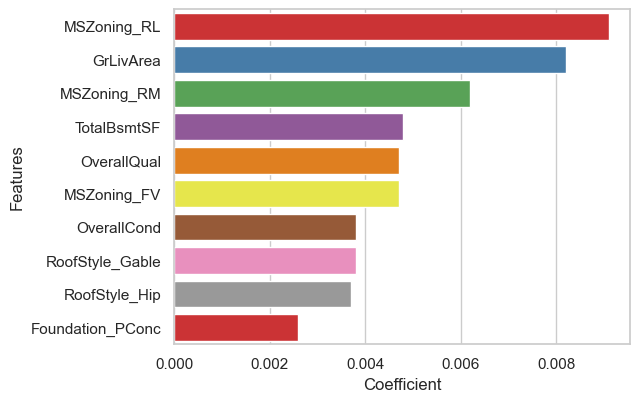

In [191]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

In [163]:
#The above graph displays the top 10 variables based on the Ridge Regression model that are significant in predicting the price of a house.

In [164]:
#Lasso

In [165]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [166]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.005245,-0.006032,1
1,0.0002,-0.005519,-0.006212,2
2,0.0003,-0.005684,-0.006301,3
3,0.0004,-0.005832,-0.006413,4
4,0.0005,-0.005968,-0.006489,5
5,0.001,-0.006498,-0.006855,6
6,0.002,-0.007360,-0.007584,7
7,0.003,-0.008070,-0.008284,8
8,0.004,-0.008819,-0.009001,9
9,0.005,-0.009578,-0.009712,10


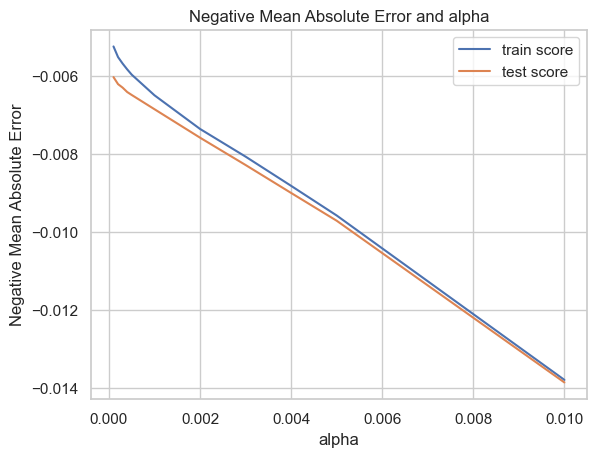

In [167]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [168]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [192]:
# check the coefficient values with lambda = 0.0001

alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 1.81318035e-03,  6.12504621e-03,  3.69681374e-03, -1.19450763e-03,
        4.52572983e-03,  0.00000000e+00,  7.87023392e-03,  2.71753548e-04,
        1.94462773e-03, -1.95155138e-03, -1.46542314e-03, -6.75721490e-04,
       -5.97651709e-04,  6.50851775e-04,  0.00000000e+00, -1.36728195e-03,
       -9.30751314e-04, -9.01241724e-04,  1.70935275e-03, -0.00000000e+00,
        2.68339830e-03,  0.00000000e+00, -3.88185815e-04, -4.53549204e-06,
       -7.64863584e-05, -1.49656303e-03, -0.00000000e+00, -3.97040405e-04,
        0.00000000e+00, -1.22692916e-03, -7.71157753e-04, -1.10958411e-03,
       -6.30639407e-04, -0.00000000e+00, -3.61136887e-04,  0.00000000e+00,
       -5.63923087e-05, -2.86731396e-04,  0.00000000e+00,  2.88018022e-04,
        0.00000000e+00, -1.18797157e-03,  6.18684331e-05,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  3.50881538e-04, -1.42228110e-04,
       -0.00000000e+00,  0.00000000e+00,  6.54100341e-05,  8.62590027e-04,
        6.84884085e-05,  

In [194]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

9.14131179794374e-05

In [195]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0018
1,OverallQual,0.0061
2,OverallCond,0.0037
3,BsmtUnfSF,-0.0012
4,TotalBsmtSF,0.0045
5,GrLivArea,0.0079
6,FullBath,0.0003
7,GarageCars,0.0019
8,BuiltOrRemodelAge,-0.0020
9,MSSubClass_30,-0.0015


In [196]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 0.0018131803494207124,
 'OverallQual': 0.006125046213306209,
 'OverallCond': 0.0036968137390194665,
 'BsmtUnfSF': -0.0011945076301804428,
 'TotalBsmtSF': 0.00452572982582578,
 '1stFlrSF': 0.0,
 'GrLivArea': 0.0078702339238235,
 'FullBath': 0.0002717535484367257,
 'GarageCars': 0.001944627733373583,
 'BuiltOrRemodelAge': -0.001951551377239957,
 'MSSubClass_30': -0.001465423135326274,
 'MSSubClass_45': -0.0006757214898440038,
 'MSSubClass_50': -0.0005976517086002772,
 'MSSubClass_60': 0.0006508517751591679,
 'MSSubClass_80': 0.0,
 'MSSubClass_90': -0.0013672819471668464,
 'MSSubClass_160': -0.0009307513137942326,
 'MSSubClass_190': -0.0009012417241168326,
 'MSZoning_FV': 0.0017093527537068453,
 'MSZoning_RH': -0.0,
 'MSZoning_RL': 0.002683398296710458,
 'MSZoning_RM': 0.0,
 'LotConfig_FR2': -0.0003881858147631043,
 'Neighborhood_BrDale': -4.535492041847851e-06,
 'Neighborhood_CollgCr': -7.648635841429209e-05,
 'Neighborhood_Edwards': -0.0014965630326424445,
 'Neighborhood_Gil

In [197]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge

# Create a Ridge regression model
ridge_model = Ridge()

# Running RFE with the number of features to select
rfe = RFE(estimator=ridge_model, n_features_to_select=15)
rfe.fit(X_train_ridge, y_train)

# Selected features
selected_features = X_train_ridge.columns[rfe.support_]

# Display the selected features
print(selected_features)


Index(['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'GarageCars', 'BuiltOrRemodelAge', 'MSZoning_FV',
       'MSZoning_RL', 'MSZoning_RM', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'Foundation_PConc', 'BsmtFinType1_Unf'],
      dtype='object')


In [198]:
# Do an RFE to minimise the features to 15
X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# Running RFE
rfe = RFE(lm, n_features_to_select=15)  # Specify the number of features directly in the fit method
rfe.fit(X_train_lasso, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [199]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.007870
1,OverallQual,True,1,0.006125
4,TotalBsmtSF,True,1,0.004526
2,OverallCond,True,1,0.003697
9,MSZoning_RL,True,1,0.002683
6,GarageCars,True,1,0.001945
12,Foundation_PConc,True,1,0.001908
0,LotArea,True,1,0.001813
8,MSZoning_FV,True,1,0.001709
14,SaleCondition_Normal,True,1,0.001646


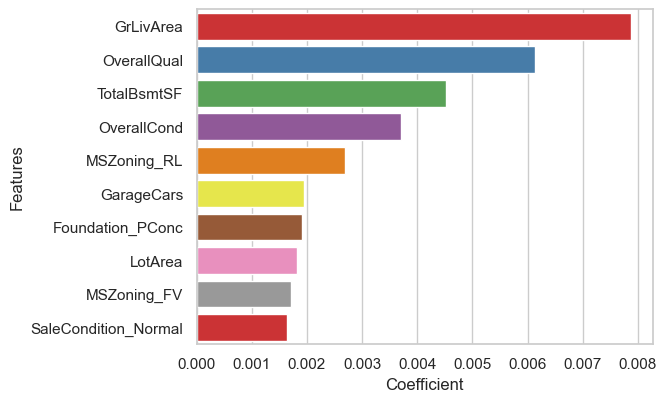

In [200]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

In [201]:
## now Removing the current Top 5 Predictors, and creating a new model to find the new Top 5 Predictors. 

In [203]:

X_train_lasso = X_train[lasso_df.Features]
your_alpha_value=0.0001
# Assuming lasso_coeff_dict is a dictionary containing Lasso coefficients
def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot
temp2_df = pd.DataFrame(list(zip(X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)

# Display the top 10 features
print("Top 10 important features:")
print(temp2_df.head(10))

# Remove the top 5 features
removed_features = temp2_df.head(5)['Features'].tolist()
X_train_lasso_filtered = X_train_lasso.drop(columns=removed_features)

# Create a new Lasso model with the filtered features
lasso_model_filtered = Lasso(alpha=your_alpha_value)  # Specify the appropriate alpha value
lasso_model_filtered.fit(X_train_lasso_filtered, y_train)

# Get the coefficients of the new model
new_lasso_coeff_dict = dict(zip(X_train_lasso_filtered.columns, lasso_model_filtered.coef_))

# Display the top 5 features in the new model
top_5_features_filtered = sorted(new_lasso_coeff_dict, key=new_lasso_coeff_dict.get, reverse=True)[:5]
print("Top 5 important features in the new model:")
for feature in top_5_features_filtered:
    print(f"{feature}: {new_lasso_coeff_dict[feature]}")


Top 10 important features:
                Features  rfe_support  rfe_ranking  Coefficient
5              GrLivArea         True            1     0.007870
1            OverallQual         True            1     0.006125
4            TotalBsmtSF         True            1     0.004526
2            OverallCond         True            1     0.003697
9            MSZoning_RL         True            1     0.002683
6             GarageCars         True            1     0.001945
12      Foundation_PConc         True            1     0.001908
0                LotArea         True            1     0.001813
8            MSZoning_FV         True            1     0.001709
14  SaleCondition_Normal         True            1     0.001646
Top 5 important features in the new model:
LotArea: 0.004947338368035384
FullBath: 0.0047206129915140635
FireplaceQu_Gd: 0.003437495983406293
GarageCars: 0.003129227743999374
MSSubClass_60: 0.0026787998545224176


## Conclusion :

# The optimal lambda value in case of Ridge and Lasso is as below:

- Ridge - 6
- Lasso - 0.0001

# The Mean Squared error in case of Ridge and Lasso are:

- Ridge - 9.23
- Lasso - 9.22

# The Mean Squared Error of Lasso is slightly lower than that of Ridge

- Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.

- Hence based on Lasso, the factors that generally affect the price are the Zoning classification, Living area square feet, Overall quality and condition of the house, Foundation type of the house, Number of cars that can be accomodated in the garage, Total basement area in square feet and the Basement finished square feet area

Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.